In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
plt.style.use("ggplot")

### **Decision Trees**

In [3]:
# Ejercicio 3

In [4]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = iris.data
y = iris.target

In [6]:
criterion = "entropy" # gini - entropy

clf = DecisionTreeClassifier(
    criterion=criterion, 
    random_state=42
)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

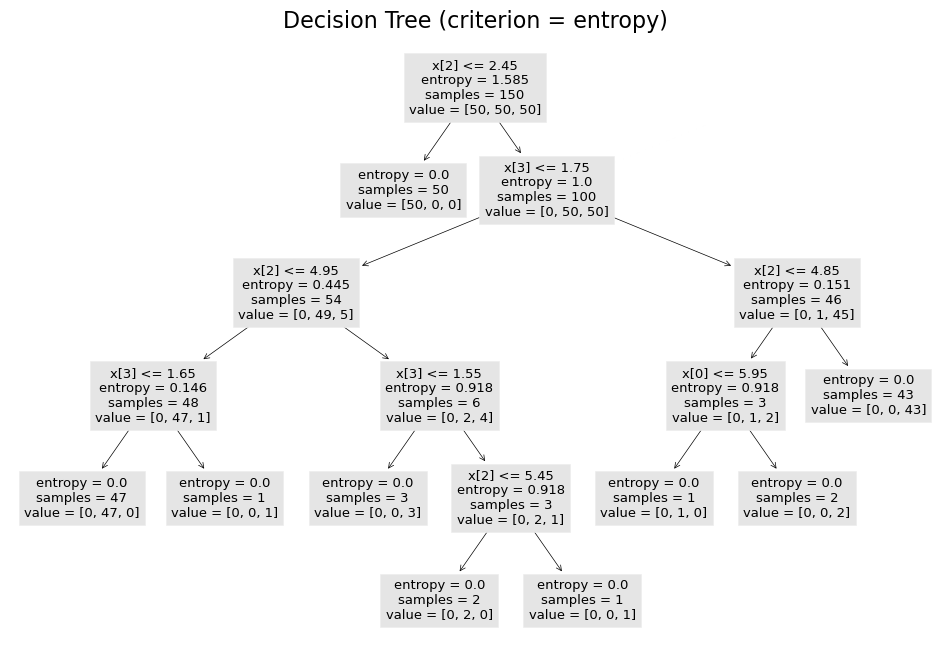

In [7]:
plt.figure(figsize=(12, 8))
plot_tree(clf)
plt.title(f"Decision Tree (criterion = {criterion})", fontsize=16)
plt.show()

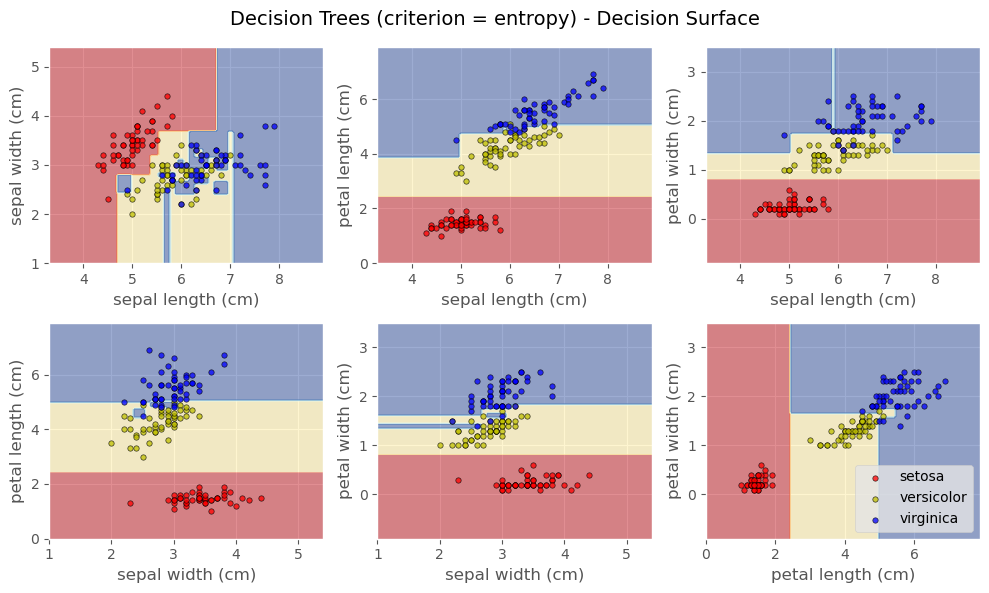

In [8]:
fig, sub = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

fig.suptitle(f"Decision Trees (criterion = {criterion}) - Decision Surface", fontsize=14)

for pair, ax in zip([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]], sub.flatten()):

    X_2d = iris.data[:, pair]

    clf_2d = DecisionTreeClassifier(
        criterion=criterion, 
        random_state=42
    )
    clf_2d.fit(X_2d, y)

    DecisionBoundaryDisplay.from_estimator(
        clf_2d,
        X_2d,
        response_method="predict",
        cmap=plt.cm.RdYlBu,
        alpha=0.5,
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    for i, c in zip(range(3), "ryb"):
        idx = np.where(y == i)
        ax.scatter(
            X_2d[idx, 0],
            X_2d[idx, 1],
            color=c,
            alpha=0.75,
            s=15,
            edgecolor="black",
            label=iris.target_names[i],
        )

plt.legend(loc="lower right")

plt.tight_layout()

plt.show()

In [9]:
# Ejercicio 4

In [10]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
X = cancer.data
y = cancer.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=4, stratify=y
)

In [13]:
clf = DecisionTreeClassifier(random_state=42)

In [14]:
path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas
impurities = path.impurities

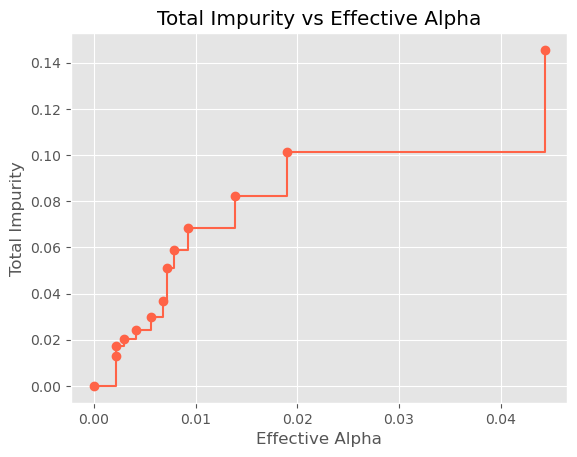

In [15]:
plt.plot(ccp_alphas[:-1], impurities[:-1], color="tomato", marker="o", drawstyle="steps-post")

plt.title("Total Impurity vs Effective Alpha")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity")

plt.show()

In [16]:
models = []
for ccp_alpha in ccp_alphas:

    clf = DecisionTreeClassifier(
        ccp_alpha=ccp_alpha, 
        random_state=42
    )
    clf.fit(X_train, y_train)
    
    models.append(clf)

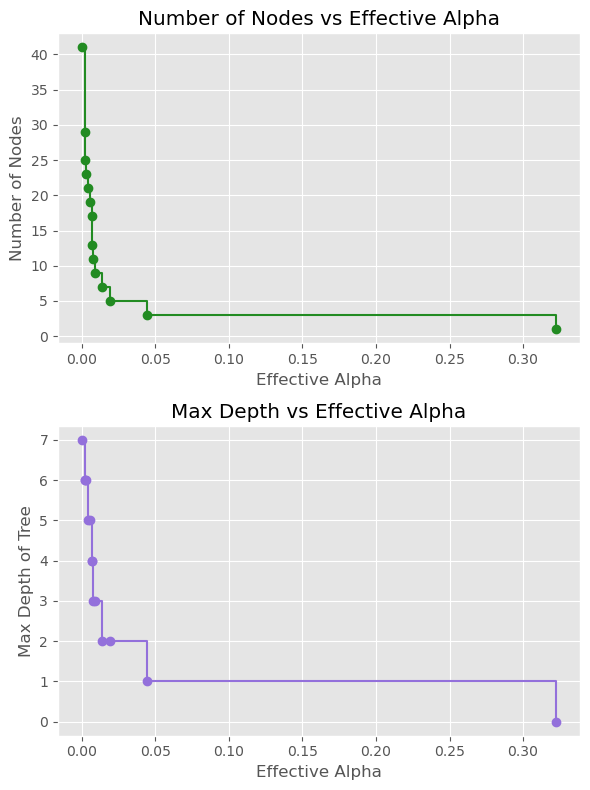

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

node_counts = [clf.tree_.node_count for clf in models]
ax[0].plot(ccp_alphas, node_counts, color="forestgreen", marker="o", drawstyle="steps-post")
ax[0].set_title("Number of Nodes vs Effective Alpha")
ax[0].set_xlabel("Effective Alpha")
ax[0].set_ylabel("Number of Nodes")

max_depth = [clf.tree_.max_depth for clf in models]
ax[1].plot(ccp_alphas, max_depth, color="mediumpurple", marker="o", drawstyle="steps-post")
ax[1].set_title("Max Depth vs Effective Alpha")
ax[1].set_xlabel("Effective Alpha")
ax[1].set_ylabel("Max Depth of Tree")

plt.tight_layout()

plt.show()

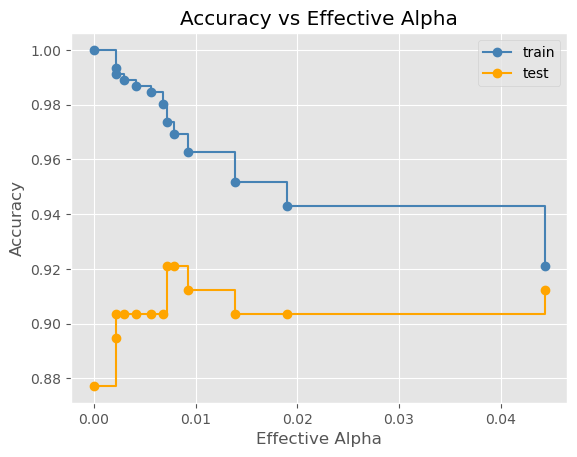

In [18]:
train_scores = [clf.score(X_train, y_train) for clf in models]
test_scores = [clf.score(X_test, y_test) for clf in models]

plt.plot(ccp_alphas[:-1], train_scores[:-1], color="steelblue", marker="o", drawstyle="steps-post", label="train")
plt.plot(ccp_alphas[:-1], test_scores[:-1], color="orange", marker="o", drawstyle="steps-post", label="test")

plt.title("Accuracy vs Effective Alpha")
plt.xlabel("Effective Alpha")
plt.ylabel("Accuracy")

plt.legend()

plt.show()